In [2]:
!pip install sqlalchemy

In [3]:
import os
import pymysql
import mysql.connector
from sqlalchemy import create_engine

import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import sqlite3

connection = sqlite3.connect('student_grades.db')

In [6]:
cursor = connection.cursor()

In [7]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL
)
''')

In [8]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT NOT NULL,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

In [9]:
students_data = [
    (1, "Alice", "Johnson"),
    (2,"Bob", "Smith"),
    (3,"Carol", "White"),
    (4,"David","Brown"),
    (5,"Eve","Davis")
]
cursor.executemany(''' INSERT INTO students (student_id,first_name,last_name) VALUES (?,?,?) ''', students_data)
connection.commit()

In [12]:
grades_data = [
    (1,1,"Math",95),
    (2,1,"English",88),
    (3,1,"History",90),
    (4,2,"Math",82),
    (5,2,"English",76),
    (6,2,"History",85),
    (7,3,"Math",78),
    (8,3,"English",90),
    (9,3,"History",100),
    (10,4,"Math",64),
    (11,4,"English",45),
    (12,4,"History",55),
    (13,5,"Math",100),
    (14,5,"English",98),
    (15,5,"History",99)
]
cursor.executemany(''' INSERT INTO grades (grade_id,student_id,subject,grade) VALUES (?,?,?,?) ''', grades_data)
connection.commit()

In [15]:
##Query 1
cursor.execute('''SELECT students.first_name, students.last_name, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id''')

student_grade = cursor.fetchall()
print(f"Students and grades: {student_grade}")



Students and grades: [('Alice', 'Johnson', 95), ('Alice', 'Johnson', 88), ('Alice', 'Johnson', 90), ('Bob', 'Smith', 82), ('Bob', 'Smith', 76), ('Bob', 'Smith', 85), ('Carol', 'White', 78), ('Carol', 'White', 90), ('Carol', 'White', 100), ('David', 'Brown', 64), ('David', 'Brown', 45), ('David', 'Brown', 55), ('Eve', 'Davis', 100), ('Eve', 'Davis', 98), ('Eve', 'Davis', 99)]


In [16]:
## Query 2
cursor.execute('''SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id''')

avg_grade = cursor.fetchall()

print(f"Average grade per student: {avg_grade}")

Average grade per student: [('Alice', 'Johnson', 91.0), ('Bob', 'Smith', 81.0), ('Carol', 'White', 89.33333333333333), ('David', 'Brown', 54.666666666666664), ('Eve', 'Davis', 99.0)]


In [17]:
## Query 3
cursor.execute('''SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
ORDER BY average_grade DESC
LIMIT 1 ''')

highest_student = cursor.fetchall()

print(f"Highest Average Grade Student: {highest_student}")

Highest Average Grade Student: [('Eve', 'Davis', 99.0)]


In [18]:
## Query 4
cursor.execute('''SELECT AVG(grades.grade) AS average_math_grade
FROM grades
WHERE grades.subject = 'Math' ''')

average_math = cursor.fetchall()

print(f"Average grade for Math: {average_math}")

Average grade for Math: [(83.8,)]


In [19]:
## Query 5
cursor.execute('''SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90''')

above_90 = cursor.fetchall()

print(f"Students who scored above 90 in any subject: {above_90} ")

Students who scored above 90 in any subject: [('Alice', 'Johnson', 'Math', 95), ('Carol', 'White', 'History', 100), ('Eve', 'Davis', 'Math', 100), ('Eve', 'Davis', 'English', 98), ('Eve', 'Davis', 'History', 99)] 


In [21]:
import pandas as pd
students_df = pd.read_sql_query("SELECT * FROM students", connection)
grades_df = pd.read_sql_query("SELECT * FROM grades", connection)

In [22]:
students_df.head()

,student_id,first_name,last_name
0,1,Alice,Johnson
1,2,Bob,Smith
2,3,Carol,White
3,4,David,Brown
4,5,Eve,Davis


In [23]:
new_df = pd.read_sql_query('''
    SELECT students.first_name, students.last_name, grades.subject, grades.grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
''', connection)

In [24]:
new_df.head()

,first_name,last_name,subject,grade
0,Alice,Johnson,Math,95
1,Alice,Johnson,English,88
2,Alice,Johnson,History,90
3,Bob,Smith,Math,82
4,Bob,Smith,English,76


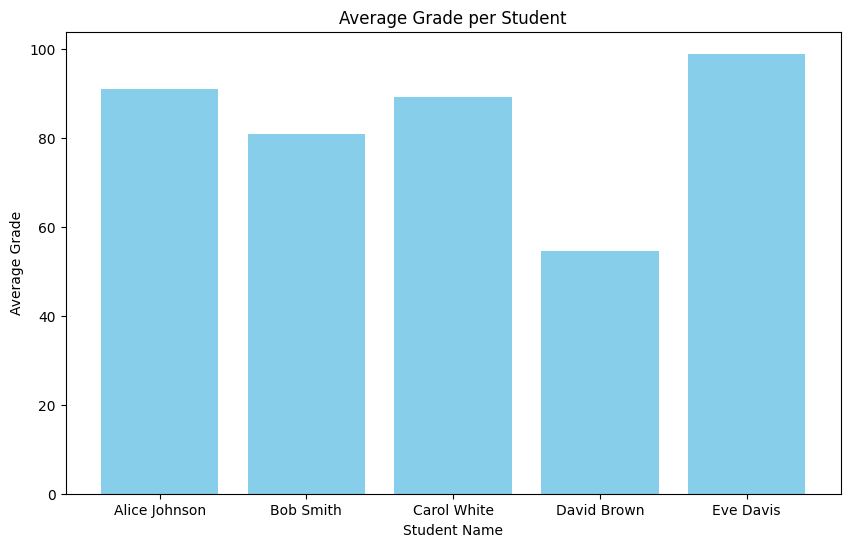

In [26]:
import matplotlib.pyplot as plt 
avg_grades = new_df.groupby(['first_name', 'last_name'])['grade'].mean().reset_index()

avg_grades['full_name'] = avg_grades['first_name'] + ' ' + avg_grades['last_name']

plt.figure(figsize=(10, 6))
plt.bar(avg_grades['full_name'], avg_grades['grade'], color='skyblue')
plt.xlabel('Student Name')
plt.ylabel('Average Grade')
plt.title('Average Grade per Student')

plt.show()

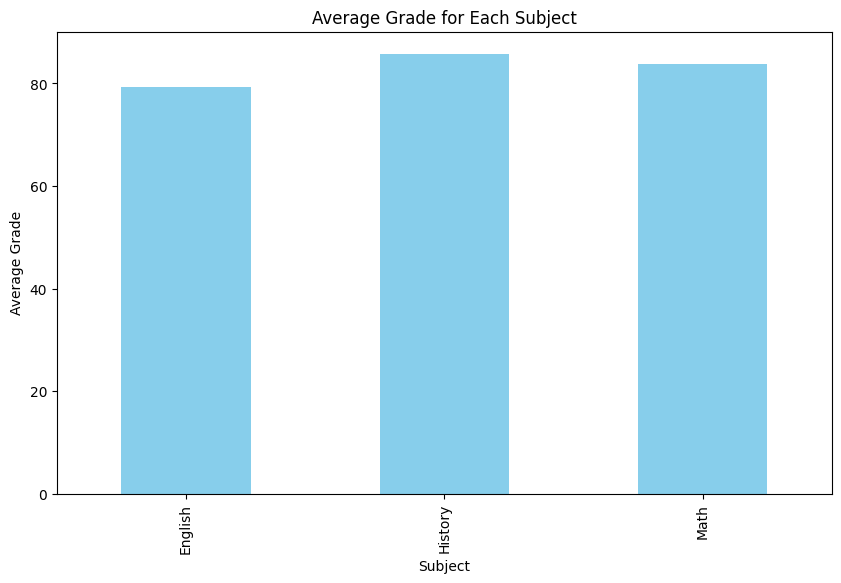

In [29]:
avg_grade_per_subject = new_df.groupby('subject')['grade'].mean()

plt.figure(figsize=(10, 6))
avg_grade_per_subject.plot(kind='bar', color='skyblue')
plt.title('Average Grade for Each Subject')
plt.xlabel('Subject')
plt.ylabel('Average Grade') 
plt.show()

In [30]:
connection.close()